<h2> Base Model - CNN with 1 Convolutional Layer </h2>

In [0]:
import glob
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn.metrics as metrics

import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import add, concatenate, Conv2D, Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, AveragePooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/'  #change dir to your project folder

In [0]:
trDatOrg       = np.load(root_path + 'Flower_Power/flrnonflr-train-imgs224-0.8.npz')['arr_0']
trLblOrg       = np.load(root_path + 'Flower_Power/flrnonflr-train-labels224-0.8.npz')['arr_0']
tsDatOrg       = np.load(root_path + 'Flower_Power/flrnonflr-test-imgs224-0.8.npz')['arr_0']
tsLblOrg       = np.load(root_path + 'Flower_Power/flrnonflr-test-labels224-0.8.npz')['arr_0']

print("For the training and test datasets:")
print("The shapes are %s, %s, %s, %s" \
      %(trDatOrg.shape, trLblOrg.shape, tsDatOrg.shape, tsLblOrg.shape))

For the training and test datasets:
The shapes are (4264, 224, 224, 3), (4264,), (1067, 224, 224, 3), (1067,)


Showing 123 index image, It is 1.0


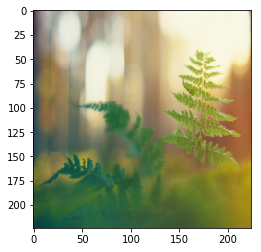

Showing 743 index image, It is 0.0


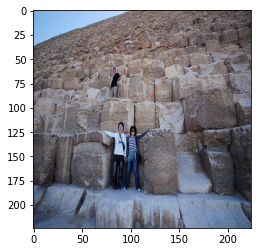

Showing 342 index image, It is 1.0


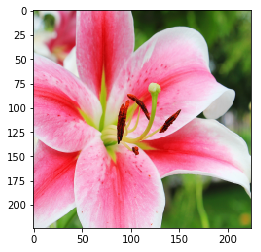

Showing 980 index image, It is 0.0


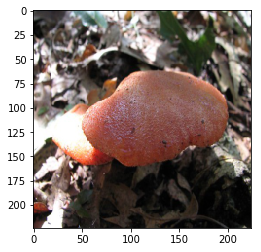

Showing 439 index image, It is 1.0


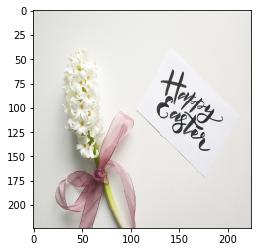

In [0]:
# Randomly show 5 examples of the images

data = tsDatOrg
label = tsLblOrg

for i in range(5):
    index = random.randint(0, len(data)-1)
    print("Showing %s index image, It is %s" %(index, label[index]))
    imgplot = plt.imshow(data[index])
    plt.show()

In [0]:
# Convert the data into 'float32'
# Rescale the values from 0~255 to 0~1
trDat       = trDatOrg.astype('float32')/255
tsDat       = tsDatOrg.astype('float32')/255

# Retrieve the row size of each image
# Retrieve the column size of each image
imgrows     = trDat.shape[1]
imgclms     = trDat.shape[2]
channel     = 3

# Perform one hot encoding on the labels
# Retrieve the number of classes in this problem
trLbl       = to_categorical(trLblOrg,2)
tsLbl       = to_categorical(tsLblOrg,2)
num_classes = tsLbl.shape[1]

In [0]:
# X_train forms the test images, and y_test forms the test labels
X_train, y_train = trDat, trLbl
X_test,y_test = tsDat,tsLbl 

<h2> Define Model </h2>

<p>The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.
  
The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters. Here I choose the pooling window with size 2 x 2.
  
The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.
  
I do a 2-way classification (as there are flowers and non-flowers), using a final layer with 2 outputs and a softmax activation. Softmax activation enables me to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input. <p>

In [0]:
def createBaseModel():
  inputs = Input(shape=(imgrows, imgclms, channel))
  x = Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(784,))
  x = MaxPooling2D(pool_size=(2, 2))(x)
  
  x = Flatten()(x)
  
  x = Dense(128, activation='relu')(x)
  x = Dense(num_classes, activation='softmax')(x)
  
  model = Model(inputs=[inputs],outputs=x)
  
  model.compile(loss='categorical_crossentropy', 
                 optimizer='adam',
                  metrics=['accuracy'])
  
  return model
  
model = createBaseModel()
modelGo = createBaseModel()

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               51380352  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total par

<h2> Training the Model </h2>

<p>I train the model with batch size of 64 and 20 epochs on both training and validation data. </p>

In [0]:
# Fit the model
# This is where the training starts
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1)

Epoch 1/20
4264/4264 [==============================] - 12s 3ms/sample - loss: 8.9127 - acc: 0.6001
Epoch 2/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.4622 - acc: 0.7953
Epoch 3/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.3221 - acc: 0.8722
Epoch 4/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.2303 - acc: 0.9184
Epoch 5/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.1322 - acc: 0.9636
Epoch 6/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.0890 - acc: 0.9791
Epoch 7/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.0424 - acc: 0.9944
Epoch 8/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.0254 - acc: 0.9981
Epoch 9/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.0152 - acc: 0.9993
Epoch 10/20
4264/4264 [==============================] - 8s 2ms/sample - loss: 0.0105 - acc: 0.9998
Epoch 11

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7425525290114698
Test accuracy: 0.8481724


In [0]:
# Make classification on the test dataset
predicts    = model.predict(X_test)

# Prepare the classification output
# for the classification report
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(y_test,axis=1)

# the labels for the classfication report
labelname   = ['flower', 'non-flower']


testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)


print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,target_names=labelname,digits=4))
print(confusion)

Best accuracy (on testing dataset): 84.82%
              precision    recall  f1-score   support

      flower     0.8017    0.8546    0.8273       454
  non-flower     0.8868    0.8434    0.8645       613

    accuracy                         0.8482      1067
   macro avg     0.8442    0.8490    0.8459      1067
weighted avg     0.8506    0.8482    0.8487      1067

[[388  66]
 [ 96 517]]


<h2> Data Augmentation </h2>

This section tests the usefulness of data augmentation in reducing overfitting. 

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

1. rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
2. width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
3. shear_range is for randomly applying shearing transformations.
4. zoom_range is for randomly zooming inside pictures.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

batches = gen.flow(X_train, y_train, batch_size=64)

In [0]:
history1 = model.fit_generator(batches, steps_per_epoch=3411//64, epochs=20,use_multiprocessing=True)

Epoch 1/20
53/53 [==============================] - 41s 767ms/step - loss: 0.6841 - acc: 0.7485
Epoch 2/20
53/53 [==============================] - 41s 780ms/step - loss: 0.4112 - acc: 0.8293
Epoch 3/20
53/53 [==============================] - 41s 767ms/step - loss: 0.3724 - acc: 0.8426
Epoch 4/20
53/53 [==============================] - 41s 772ms/step - loss: 0.3654 - acc: 0.8495
Epoch 5/20
53/53 [==============================] - 41s 767ms/step - loss: 0.3406 - acc: 0.8578
Epoch 6/20
53/53 [==============================] - 42s 802ms/step - loss: 0.3336 - acc: 0.8561
Epoch 7/20
53/53 [==============================] - 45s 856ms/step - loss: 0.3342 - acc: 0.8583
Epoch 8/20
53/53 [==============================] - 41s 769ms/step - loss: 0.3098 - acc: 0.8723
Epoch 9/20
53/53 [==============================] - 40s 753ms/step - loss: 0.3268 - acc: 0.8603
Epoch 10/20
53/53 [==============================] - 39s 745ms/step - loss: 0.3005 - acc: 0.8711
Epoch 11/20
53/53 [====================

In [0]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.3949159873682646
Test accuracy: 0.86316776


In [0]:
# Make classification on the test dataset
predicts    = model.predict(X_test)

# Prepare the classification output
# for the classification report
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(y_test,axis=1)

# the labels for the classfication report
labelname   = ['flower', 'non-flower']


testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)


print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,target_names=labelname,digits=4))
print(confusion)

Best accuracy (on testing dataset): 86.32%
              precision    recall  f1-score   support

      flower     0.9350    0.7291    0.8193       454
  non-flower     0.8275    0.9625    0.8899       613

    accuracy                         0.8632      1067
   macro avg     0.8813    0.8458    0.8546      1067
weighted avg     0.8732    0.8632    0.8599      1067

[[331 123]
 [ 23 590]]


<Figure size 432x288 with 0 Axes>

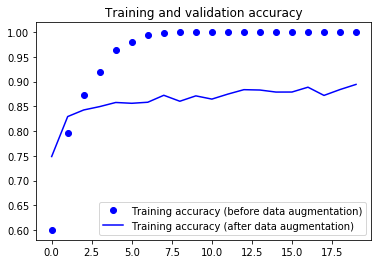

<Figure size 432x288 with 0 Axes>

In [0]:
#plot graphs to interpret the results (before data augmentation)

accuracy_org = history.history['acc']
loss_org = history.history['loss']
epochs_org = range(len(accuracy_org))

plt.plot(epochs_org, accuracy_org, 'bo', label='Training accuracy (before data augmentation)')
plt.plot(epochs_org1, accuracy_org1, 'b', label='Training accuracy (after data augmentation)')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

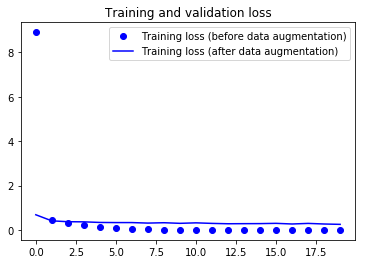

<Figure size 432x288 with 0 Axes>

In [0]:
accuracy_org1 = history1.history['acc']
loss_org1 = history1.history['loss']
epochs_org1= range(len(accuracy_org1))

plt.plot(epochs_org, loss_org, 'bo', label='Training loss (before data augmentation)')
plt.plot(epochs_org1, loss_org1, 'b', label='Training loss (after data augmentation)')
plt.title('Training and validation loss')
plt.legend()
plt.figure()